In [13]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import pearsonr
import numpy as np


In [14]:
days_pending_temperature_csv = 'Resources_Clean/clean_temperature_cities.csv'

days_to_pending_temperature_df = pd.read_csv(days_pending_temperature_csv)


In [15]:
days_to_pending_temperature_df.head()

,Unnamed: 0,Region ID,Size Rank,Region Name,Region Type,State Name,Date,Median Days Pending,Median Days Pending Rolling Avg,ID,Name,State,Country,Longitude,Latitude,full_name,Temperature,Temperature (Farenheit)
0,0,394913,1,"New York, NY",msa,NY,2019-12-07,70.0,67.333333,5128638.0,New York,NY,US,-75.499901,43.000351,"New York, NY",269.9300,26.204
1,1,394913,1,"New York, NY",msa,NY,2019-12-14,76.0,71.666667,5128638.0,New York,NY,US,-75.499901,43.000351,"New York, NY",275.8075,36.784
2,2,394913,1,"New York, NY",msa,NY,2019-12-21,72.0,72.666667,5128638.0,New York,NY,US,-75.499901,43.000351,"New York, NY",261.2150,10.517
3,3,394913,1,"New York, NY",msa,NY,2019-12-28,80.0,76.000000,5128638.0,New York,NY,US,-75.499901,43.000351,"New York, NY",278.0075,40.744
4,4,394913,1,"New York, NY",msa,NY,2020-01-04,84.0,78.666667,5128638.0,New York,NY,US,-75.499901,43.000351,"New York, NY",278.7225,42.030


In [16]:
merged_reduced = days_to_pending_temperature_df[['Region ID',
                             'Size Rank',
                             'Region Name',
                             'Region Type',
                             'State Name',
                             'Date',
                             'Median Days Pending',
                             'Median Days Pending Rolling Avg',
                             'Longitude',
                             'Latitude',
                             'Temperature',
                             'Temperature (Farenheit)']]

merged_reduced = merged_reduced.rename(columns = {
                             'Median Days Pending':'Median Days to Pending',
                             'Median Days Pending Rolling Avg':'Median Days to Pending Rolling Avg',
                             'Temperature':'Temperature (Kelvin)'})

merged_reduced

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,Median Days to Pending,Median Days to Pending Rolling Avg,Longitude,Latitude,Temperature (Kelvin),Temperature (Farenheit)
0,394913,1,"New York, NY",msa,NY,2019-12-07,70.0,67.333333,-75.499901,43.000351,269.9300,26.204
1,394913,1,"New York, NY",msa,NY,2019-12-14,76.0,71.666667,-75.499901,43.000351,275.8075,36.784
2,394913,1,"New York, NY",msa,NY,2019-12-21,72.0,72.666667,-75.499901,43.000351,261.2150,10.517
3,394913,1,"New York, NY",msa,NY,2019-12-28,80.0,76.000000,-75.499901,43.000351,278.0075,40.744
4,394913,1,"New York, NY",msa,NY,2020-01-04,84.0,78.666667,-75.499901,43.000351,278.7225,42.030
...,...,...,...,...,...,...,...,...,...,...,...,...
961,394347,9,"Atlanta, GA",msa,GA,2022-12-03,32.0,28.666667,-84.387978,33.749001,284.7525,52.885
962,394347,9,"Atlanta, GA",msa,GA,2022-12-10,33.0,31.000000,-84.387978,33.749001,286.4225,55.891
963,394347,9,"Atlanta, GA",msa,GA,2022-12-17,35.0,33.333333,-84.387978,33.749001,280.1575,44.614
964,394347,9,"Atlanta, GA",msa,GA,2022-12-24,35.0,34.333333,-84.387978,33.749001,261.7900,11.552


In [17]:
merged_reduced['Date'] = pd.to_datetime(merged_reduced['Date'])

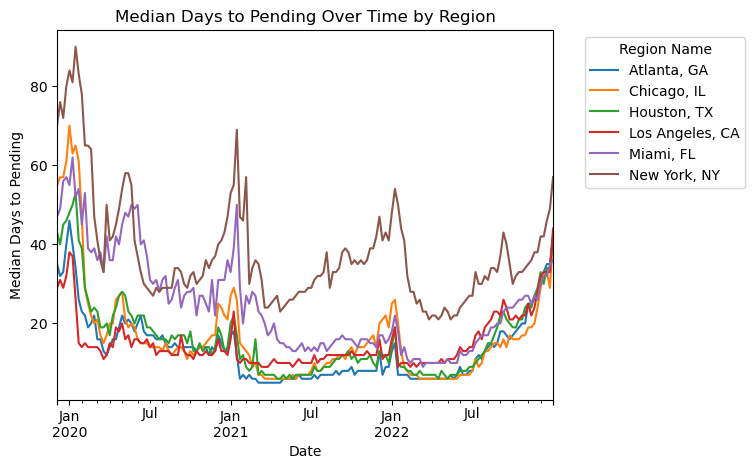

In [18]:
merged_reduced.pivot(index='Date', columns='Region Name', values='Median Days to Pending').plot(kind='line')
merged_reduced.pivot
plt.title('Median Days to Pending Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Median Days to Pending')
plt.legend(title='Region Name', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

In [19]:
merged_reduced.pivot

<bound method DataFrame.pivot of      Region ID  Size Rank   Region Name Region Type State Name       Date  \
0       394913          1  New York, NY         msa         NY 2019-12-07   
1       394913          1  New York, NY         msa         NY 2019-12-14   
2       394913          1  New York, NY         msa         NY 2019-12-21   
3       394913          1  New York, NY         msa         NY 2019-12-28   
4       394913          1  New York, NY         msa         NY 2020-01-04   
..         ...        ...           ...         ...        ...        ...   
961     394347          9   Atlanta, GA         msa         GA 2022-12-03   
962     394347          9   Atlanta, GA         msa         GA 2022-12-10   
963     394347          9   Atlanta, GA         msa         GA 2022-12-17   
964     394347          9   Atlanta, GA         msa         GA 2022-12-24   
965     394347          9   Atlanta, GA         msa         GA 2022-12-31   

     Median Days to Pending  Median Days t

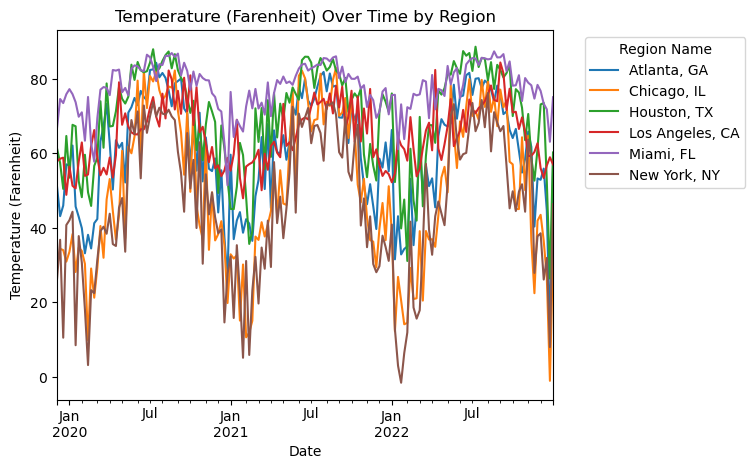

In [20]:
merged_reduced.pivot(index='Date', columns='Region Name', values='Temperature (Farenheit)').plot(kind='line')
plt.title('Temperature (Farenheit) Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Temperature (Farenheit)')
plt.legend(title='Region Name', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

In [21]:
correlation = merged_reduced['Temperature (Farenheit)'].corr(merged_reduced['Median Days to Pending'])

print(f"Correlation: {correlation}")

Correlation: -0.3234257513365829


In [22]:
# Selecting columns for linear regression
x = merged_reduced['Temperature (Farenheit)']
y = merged_reduced['Median Days to Pending']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

Slope: -0.24665300443245378
Intercept: 35.98314168844884
R-squared: 0.10460421662763324
P-value: 5.854626054109514e-25
Standard Error: 0.02324239189534806


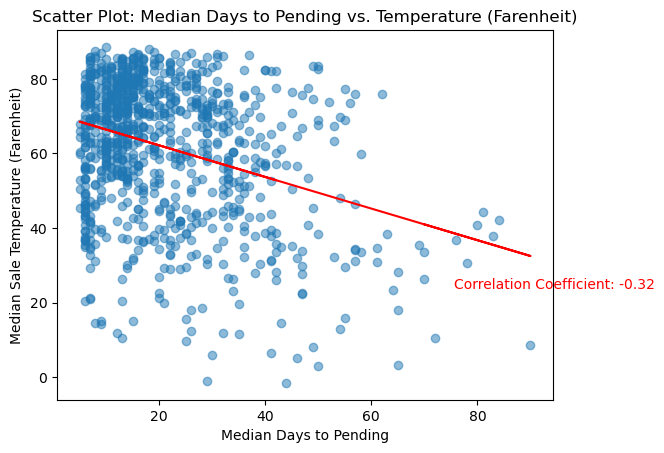

In [31]:
plt.scatter(merged_reduced['Median Days to Pending'], merged_reduced['Temperature (Farenheit)'], alpha=0.5)
plt.title('Scatter Plot: Median Days to Pending vs. Temperature (Farenheit)')
plt.xlabel('Median Days to Pending')
plt.ylabel('Median Sale Temperature (Farenheit)')

z = np.polyfit(merged_reduced['Median Days to Pending'], merged_reduced['Temperature (Farenheit)'], 1)
p = np.poly1d(z)

plt.plot(merged_reduced['Median Days to Pending'], p(merged_reduced['Median Days to Pending']), color='red')

corr_coefficient, _ = pearsonr(merged_reduced['Median Days to Pending'], merged_reduced['Temperature (Farenheit)'])
plt.annotate(f'Correlation Coefficient: {corr_coefficient:.2f}', 
             xy=(0.8, 0.3), xycoords='axes fraction',
             fontsize=10, color='Red')
plt.show()